# **Bike Trips Service Data Visualization using *Seaborn* , *Matplotlib.pyplot*** **&** ***Plotly.express***

#**About Dataset**

##**Context**

A bike-sharing service is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a certain price or free.

Many bike share systems allow people to borrow a bike from a station and return it at another station belonging to the same system.

###**Content**

This dataset contains bike trips of a bike-sharing company in New York for one month. 

The dataset consists of ≈ 1.6M rows and 11 columns. The attributes are:
1. **starttime (numeric)** : the time when a trip starts (in NYC local time). 
2. **stoptime (numeric)** : the time when a trip is over (in NYC local time).
3. **startstationid (categorical)** : a unique code to identify a station where a trip begins.
4. **startstationname (categorical)** : the name of a station where a trip begins.
5. **endstationid (categorical)** : a unique code to identify a station where a trip is over.
6. **endstationname (categorical)** : the name of a station where a trip is over.
7. **usertype (categorical)** : the type of bike user. 
8. **bikeid (categorical)** : a unique code to identify a bike user.
9. **gender (categorical)** : gender of the user.
10. **age (numeric)** : age of the user.
11. **trip_duration (numeric)** : the duration of a trip (in minutes).

###**Acknowledgements**
The dataset was accessed from the big query public dataset.

###**Inspiration**

Based on the above dataset, try to find the answer to the following questions.

1. Who is the largest group of users in May 2018?
(to answer this question, you may group the users based on some variables, e.g. user_type, gender, and age group).
2. How was the daily trend of the number of trips and number of users in May 2018?
3. What is the station that the users visit most in May 2018?

###Importing the important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The procedure for downloading the big datasets from Kaggle to Goole Colab is very time consuming, so you can visit the below link to get to know how I have downloaded the Bike Trips dataset to my Google Colab.

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajatbisht","key":"4f0118216bab85efbc07de140860ac30"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d gabrielramos87/bike-trips

 88% 33.0M/37.6M [00:00<00:00, 102MB/s] 
100% 37.6M/37.6M [00:00<00:00, 106MB/s]


In [ ]:
! unzip bike-trips.zip

Archive:  bike-trips.zip
  inflating: New York Citibike Trips.csv  


In [ ]:
data = pd.read_csv('/content/New York Citibike Trips.csv')
data.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


In [ ]:
data.info()  # looking into the basic info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_time          1595334 non-null  object 
 1   stop_time           1595334 non-null  object 
 2   start_station_id    1595334 non-null  int64  
 3   start_station_name  1595334 non-null  object 
 4   end_station_id      1595334 non-null  int64  
 5   end_station_name    1595334 non-null  object 
 6   user_type           1595334 non-null  object 
 7   bike_id             1595334 non-null  int64  
 8   gender              1595334 non-null  object 
 9   age                 1595334 non-null  int64  
 10  trip_duration       1595334 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 133.9+ MB


In [ ]:
data['start_time'] = data['start_time'].apply(pd.Timestamp)  #TimeStamp converts the column into the date/time format, making it easy to use.
data['stop_time'] = data['stop_time'].apply(pd.Timestamp)

In [ ]:
data['start_date'] = data['start_time'].dt.date  #extracting the date from the column.
data['stop_date'] = data['stop_time'].dt.date

In [ ]:
data.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration,start_date,stop_date
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97,2018-05-31,2018-06-01
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45,2018-05-31,2018-06-01
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28,2018-05-31,2018-06-01
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75,2018-05-31,2018-06-01
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05,2018-05-31,2018-06-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1595334 non-null  datetime64[ns]
 1   stop_time           1595334 non-null  datetime64[ns]
 2   start_station_id    1595334 non-null  int64         
 3   start_station_name  1595334 non-null  object        
 4   end_station_id      1595334 non-null  int64         
 5   end_station_name    1595334 non-null  object        
 6   user_type           1595334 non-null  object        
 7   bike_id             1595334 non-null  int64         
 8   gender              1595334 non-null  object        
 9   age                 1595334 non-null  int64         
 10  trip_duration       1595334 non-null  float64       
 11  start_date          1595334 non-null  object        
 12  stop_date           1595334 non-null  object        
dtypes: datetime6

In [ ]:
data = data.drop(['start_station_id', 'end_station_id', 'bike_id', 'start_time', 'stop_time'], axis = 1)

###**Id** columns are not playing an important role in the data to visualize, so dropping them off.

In [ ]:
data.head()

,start_station_name,end_station_name,user_type,gender,age,trip_duration,start_date,stop_date
0,Allen St & Stanton St,S 4 St & Wythe Ave,Subscriber,male,32,12.97,2018-05-31,2018-06-01
1,Allen St & Rivington St,William St & Pine St,Subscriber,male,24,12.45,2018-05-31,2018-06-01
2,E 12 St & 3 Ave,Carmine St & 6 Ave,Subscriber,male,39,8.28,2018-05-31,2018-06-01
3,Bedford Ave & Nassau Ave,Scholes St & Manhattan Ave,Subscriber,male,28,7.75,2018-05-31,2018-06-01
4,Central Park West & W 102 St,E 110 St & Madison Ave,Subscriber,female,51,8.05,2018-05-31,2018-06-01


### So the important columns to expore for us are the:

### **start_station_name, end_station_name, user_type, gender, age, trip_duration, start_date, stop_date**

### We will explore using graphs and certain grouping techniques to know the insigtht from it.

In [ ]:
pd.set_option('display.float_format', str)
data.describe()

,age,trip_duration
count,1595334.0,1595334.0
mean,37.85808300957668,16.433748324802238
std,11.027153834993186,284.86333170644036
min,16.0,1.02
25%,29.0,6.12
50%,35.0,10.27
75%,46.0,17.67
max,65.0,111781.68


### From the above table, we conclude that:

1. ### The average age of the population is around 38.
2. ### The trip taken by most people around is only for short period of time.

### We will check the these two columns using boxplot also, to check if there lies some outliers to our data.

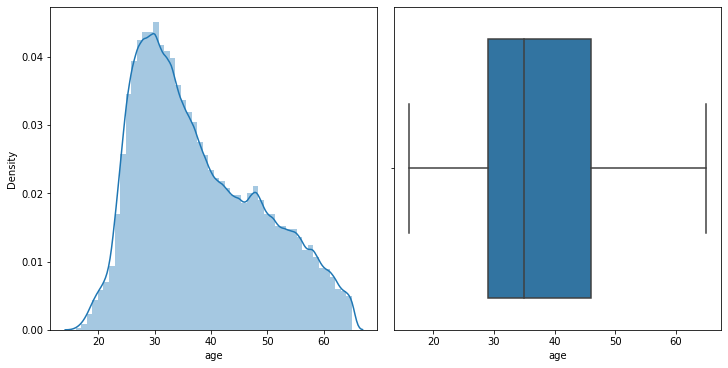

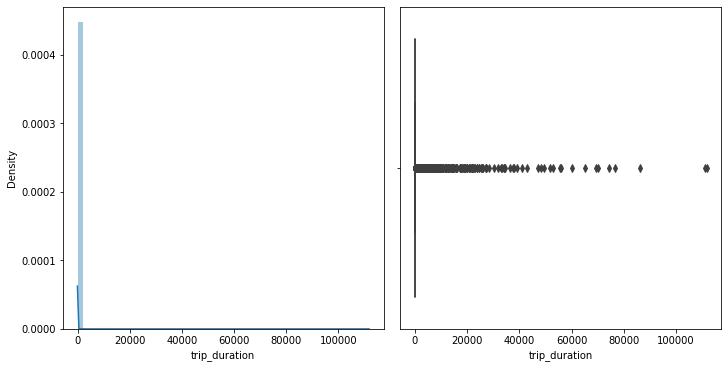

In [ ]:
for i in ['age', 'trip_duration']:
  fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize = (10,5))
  sns.distplot(data[i], ax = axes[0])
  sns.boxplot(data[i], ax = axes[1])
  plt.show()

###The **age** of the population is well distributed and no outliers found which may affect our data.

### While the trip_duration suggest that most people are using the bike for short distances to travel

## Visualizing the most frequent **Station** name from where the trips have started.

In [ ]:
df = pd.DataFrame(data['start_station_name'].value_counts().nlargest(20)).reset_index()
df = df.rename(columns = {'index': 'start_station_name', 'start_station_name' : 'Count'})
df

,start_station_name,Count
0,Pershing Square North,15504
1,W 21 St & 6 Ave,11329
2,Broadway & E 22 St,10339
3,W 33 St & 7 Ave,10259
4,E 17 St & Broadway,9867
5,West St & Chambers St,9735
6,W 41 St & 8 Ave,9471
7,W 22 St & 10 Ave,9141
8,Broadway & E 14 St,8740
9,W 31 St & 7 Ave,8527


Text(0.5, 1.0, 'Top 20 Starting Station')

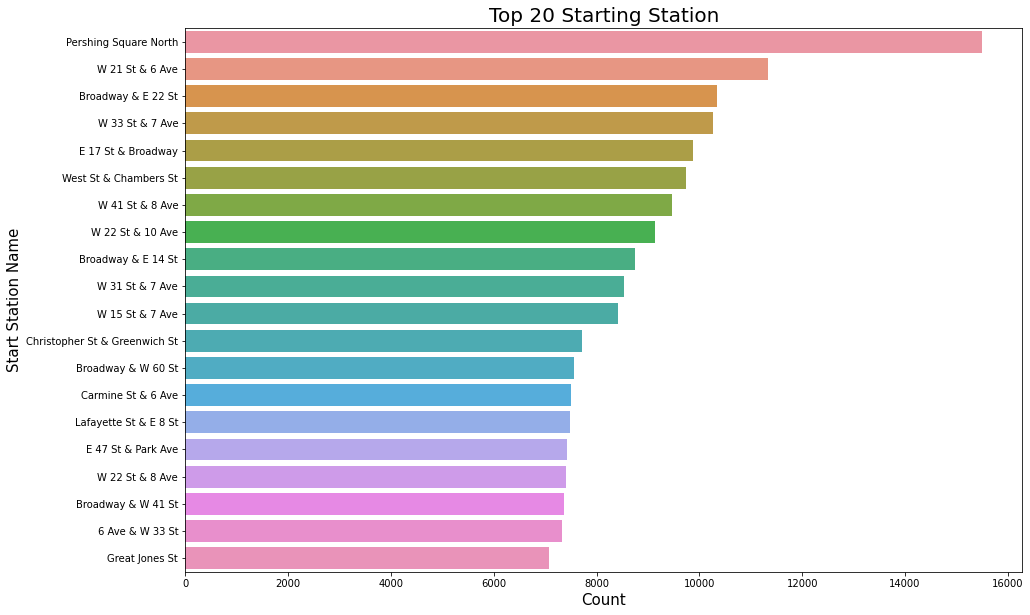

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Count', y = 'start_station_name', data = df)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Start Station Name', fontsize = 15)
plt.title('Top 20 Starting Station', fontsize = 20)

### **Pershing Square North** is on the top of the list having total of **15504** trips.

## Visualizing the start of the trips

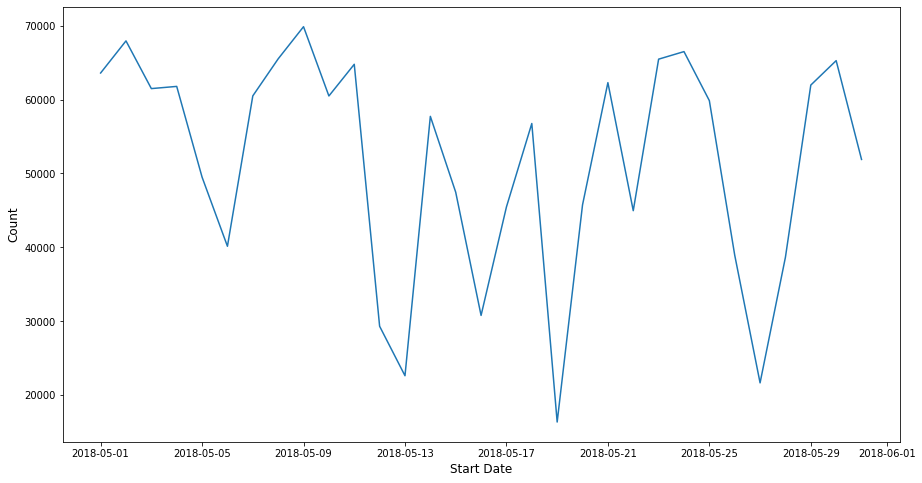

In [ ]:
plt.figure(figsize = (15,8))
plt.xlabel('Start Date', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
data['start_date'].value_counts().plot()
plt.show()

### It is an interesting graph to see, as it suggests us that in some days the people are using the services very frequently.

### In some days, there is steep fall of the users.

### Let's see if we able to find something new from the week name-wise of the data.

### We will add new column to our data, which will convert the day of the month to the week name.

In [ ]:
data['start_week_name'] = pd.to_datetime(data['start_date'])
data['start_week_name'] = data['start_week_name'].dt.day_name()
data['stop_week_name'] = pd.to_datetime(data['stop_date'])
data['stop_week_name'] = data['stop_week_name'].dt.day_name()
data.head()

,start_station_name,end_station_name,user_type,gender,age,trip_duration,start_date,stop_date,start_week_name,stop_week_name
0,Allen St & Stanton St,S 4 St & Wythe Ave,Subscriber,male,32,12.97,2018-05-31,2018-06-01,Thursday,Friday
1,Allen St & Rivington St,William St & Pine St,Subscriber,male,24,12.45,2018-05-31,2018-06-01,Thursday,Friday
2,E 12 St & 3 Ave,Carmine St & 6 Ave,Subscriber,male,39,8.28,2018-05-31,2018-06-01,Thursday,Friday
3,Bedford Ave & Nassau Ave,Scholes St & Manhattan Ave,Subscriber,male,28,7.75,2018-05-31,2018-06-01,Thursday,Friday
4,Central Park West & W 102 St,E 110 St & Madison Ave,Subscriber,female,51,8.05,2018-05-31,2018-06-01,Thursday,Friday


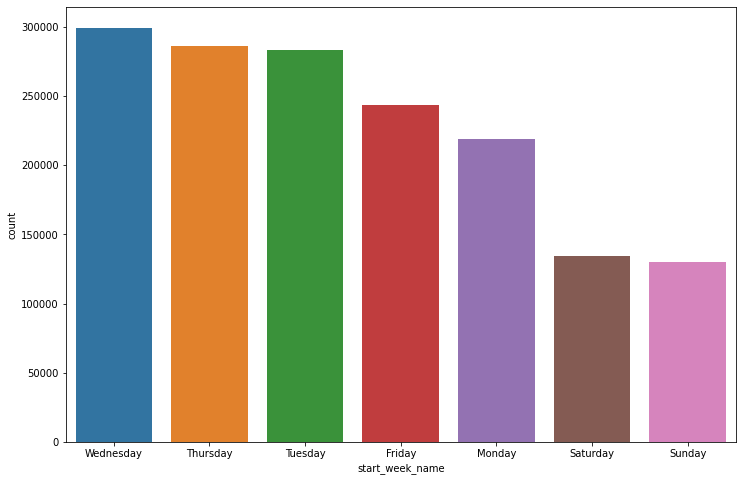

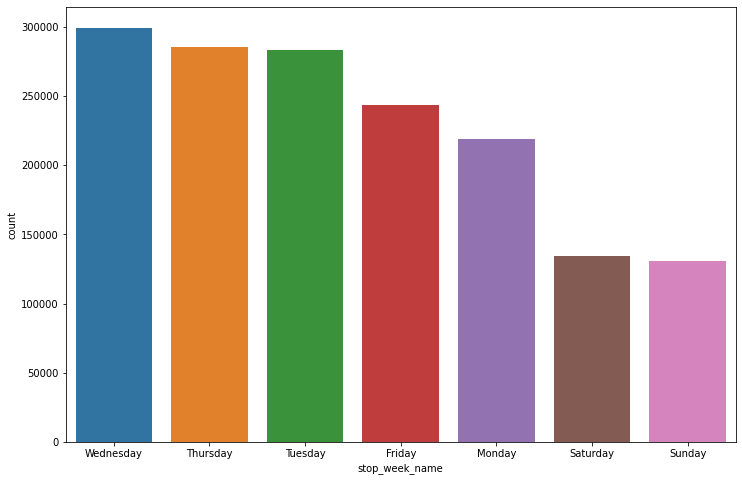

In [ ]:
for i in ['start_week_name', 'stop_week_name']:
  plt.figure(figsize = (12,8))
  sns.countplot(x = i, data = data, order = data[i].value_counts().index)
  plt.show()

### As we can see, the most of the activities of the people is seen from Monday to Friday.

### It gradually increases from Monday to Wednesday and then decline towards the weekend.

### It suggests, most people don't prefer using bike trips during weekend and the few people may be the athletes.

### The similarity between the two graphs of Start week and Stop week suggests that the trips started and ended on the same day of the month.

## User Type

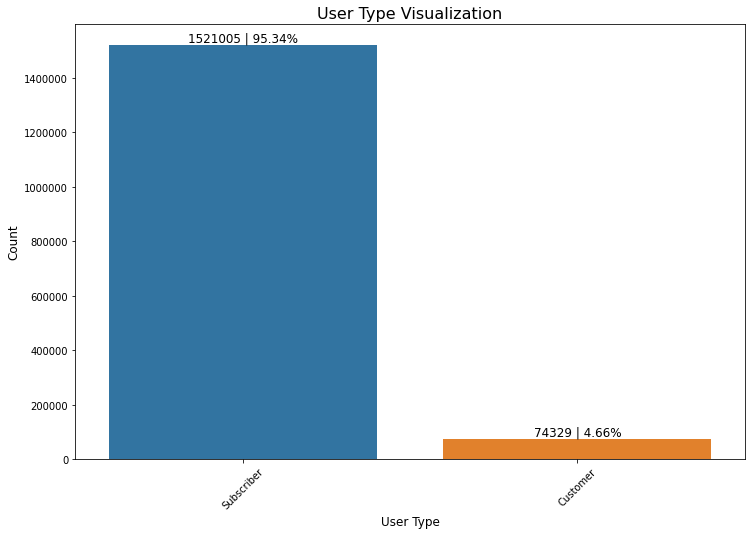

In [ ]:
plt.figure(figsize = (12,8))
plt.ticklabel_format(style = 'plain')
ax = sns.countplot(x = 'user_type', data = data)
for bar in ax.patches:
  value = bar.get_height()
  perc = round((value/data.shape[0])*100, 2)
  text = str(value) + ' | ' + str(perc) + '%'
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size = 12)
plt.title('User Type Visualization', fontsize = 16)
plt.xlabel('User Type', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Subscriber User Type is 95.34% of the total User Type of the Bike Trips.

## Gender

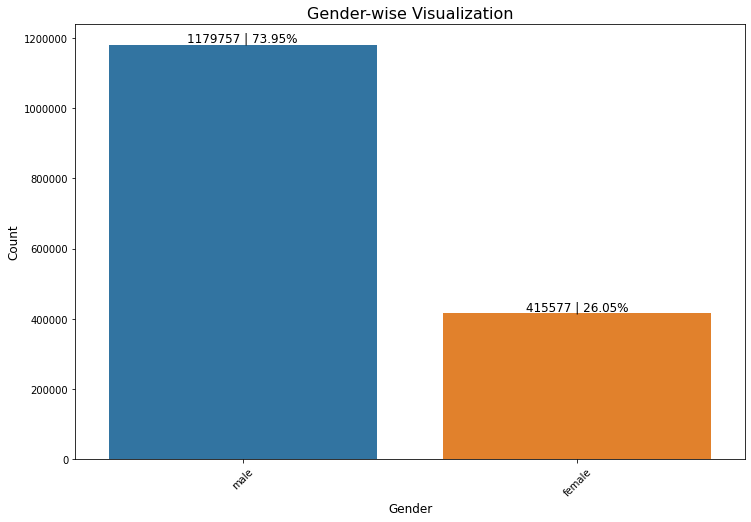

In [ ]:
plt.figure(figsize = (12,8))
plt.ticklabel_format(style = 'plain')
ax = sns.countplot(x = 'gender', data = data)
for bar in ax.patches:
  value = bar.get_height()
  perc = round((value/data.shape[0])*100, 2)
  text = str(value) + ' | ' + str(perc) + '%'
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size = 12)
plt.title('Gender-wise Visualization', fontsize = 16)
plt.xlabel('Gender', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Males are higher than the females in our data.

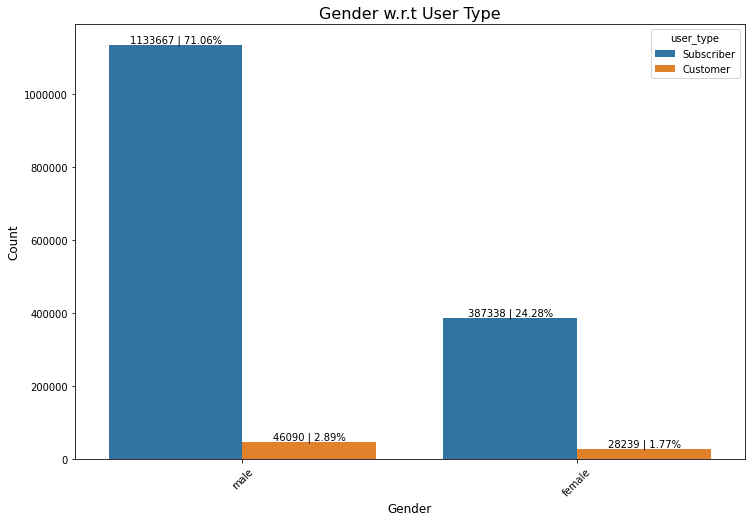

In [ ]:
plt.figure(figsize = (12, 8))
plt.ticklabel_format(style = 'plain')
ax = sns.countplot(x = 'gender', hue = 'user_type', data = data)
for bar in ax.patches:
  value = int(bar.get_height())
  perc = round((value/data.shape[0])*100, 2)
  text = str(value) + ' | ' + str(perc) + '%'
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size  = 10)
plt.xlabel('Gender', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 12)
plt.title('Gender w.r.t User Type', fontsize = 16)
plt.show()

### The higher frequency is for Male Subscribers.

## Age

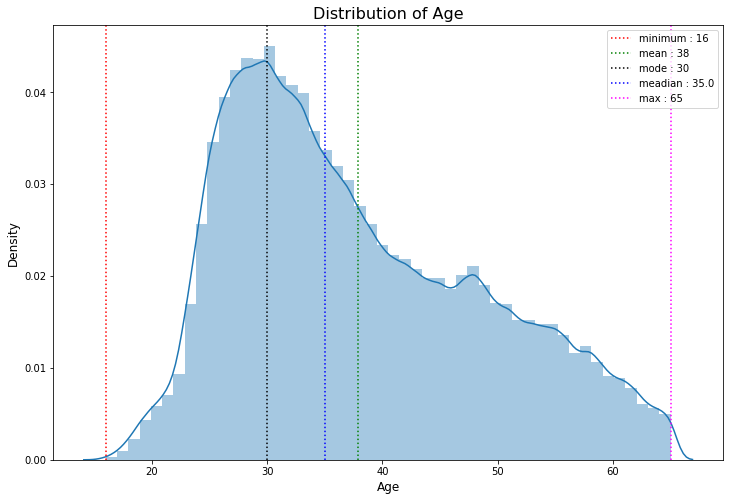

In [ ]:
plt.figure(figsize = (12, 8))
sns.distplot(data['age'])
plt.axvline(data['age'].min(), linestyle = ':', color = 'red', label = f"minimum : {data['age'].min()}")
plt.axvline(data['age'].mean(), linestyle = ':', color = 'green', label = f"mean : {round(data['age'].mean())}")
plt.axvline(data['age'].mode()[0], linestyle = ':', color = 'black', label = f"mode : {data['age'].mode()[0]}")
plt.axvline(data['age'].median(), linestyle = ':', color = 'blue', label = f"meadian : {data['age'].median()}")
plt.axvline(data['age'].max(), linestyle = ':', color = 'magenta', label = f"max : {data['age'].max()}")
plt.legend()
plt.title('Distribution of Age', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

## Age w.r.t Gender

In [ ]:
fig = px.histogram(data, x = 'age', color = 'gender', marginal = 'box')
fig.update_layout(barmode = 'group', height = 800, width = 1500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### The highest frequency is between 25-40 years for both gender.

## Age w.r.t User Type

In [ ]:
fig = px.histogram(data, x = 'age', color = 'user_type', marginal = 'box')
fig.update_layout(barmode = 'group', height = 800, width = 1700)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Very few people are Customer as we our data, and ranges between 25-30 of age.

### While the Subscriber are mostly more than 50k and ranging between 25-35 of age.

## Trip Duration w.r.t Gender

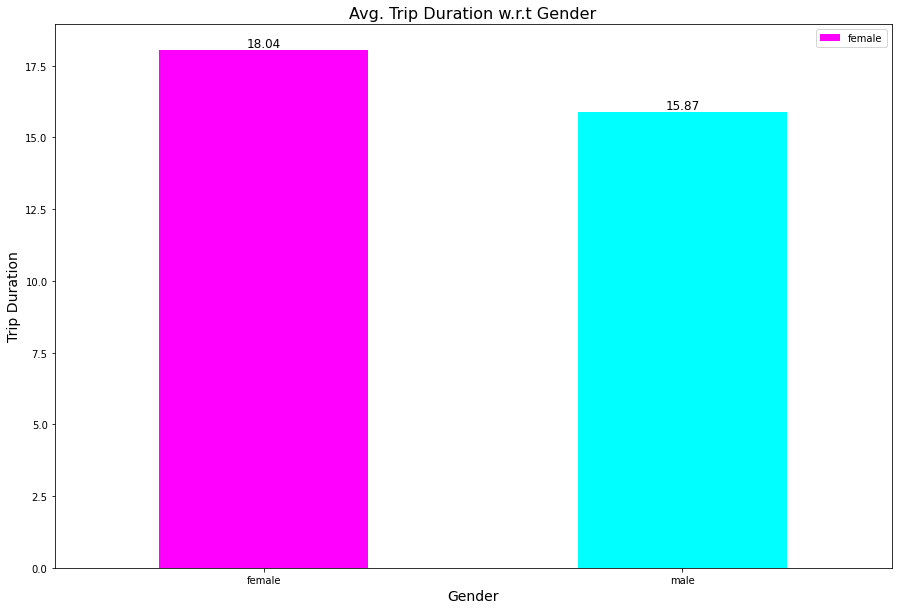

In [ ]:
plt.figure(figsize = (15,10))
ax = data.groupby(['gender'])['trip_duration'].mean().plot(kind = 'bar', color = ['magenta', 'cyan'])
for bar in ax.patches:
  value = bar.get_height()
  text = str(round(value, 2))
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size = 12)
plt.xlabel('Gender', fontsize = 14)
plt.xticks(rotation = 0)
plt.ylabel('Trip Duration', fontsize = 14)
plt.title('Avg. Trip Duration w.r.t Gender', fontsize = 16)
plt.show()

### The average trip duration of females is higher than males.

## Trip Duration w.r.t Gender and User Type

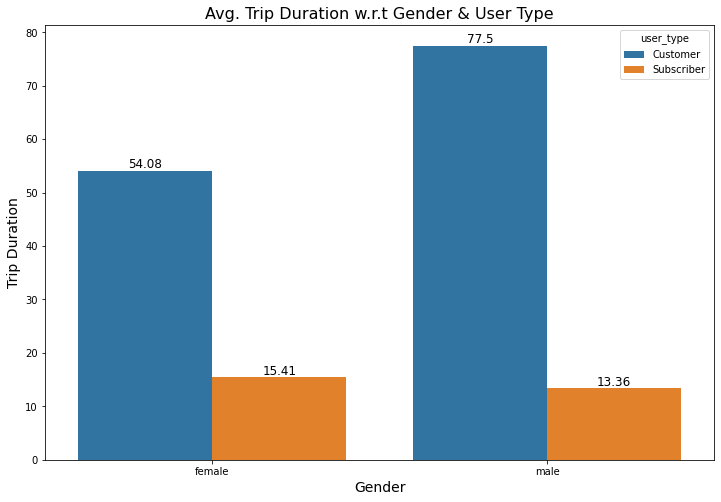

In [ ]:
df = pd.DataFrame(data.groupby(['gender', 'user_type'])['trip_duration'].mean()).reset_index()
plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'gender', y = 'trip_duration', hue = 'user_type', data = df)
for bar in ax.patches:
  value = bar.get_height()
  text = str(round(value, 2))
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size = 12)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Trip Duration', fontsize = 14)
plt.title('Avg. Trip Duration w.r.t Gender & User Type', fontsize = 16)
plt.show()

### The average Trip Duration for male customers has the highest frequency.

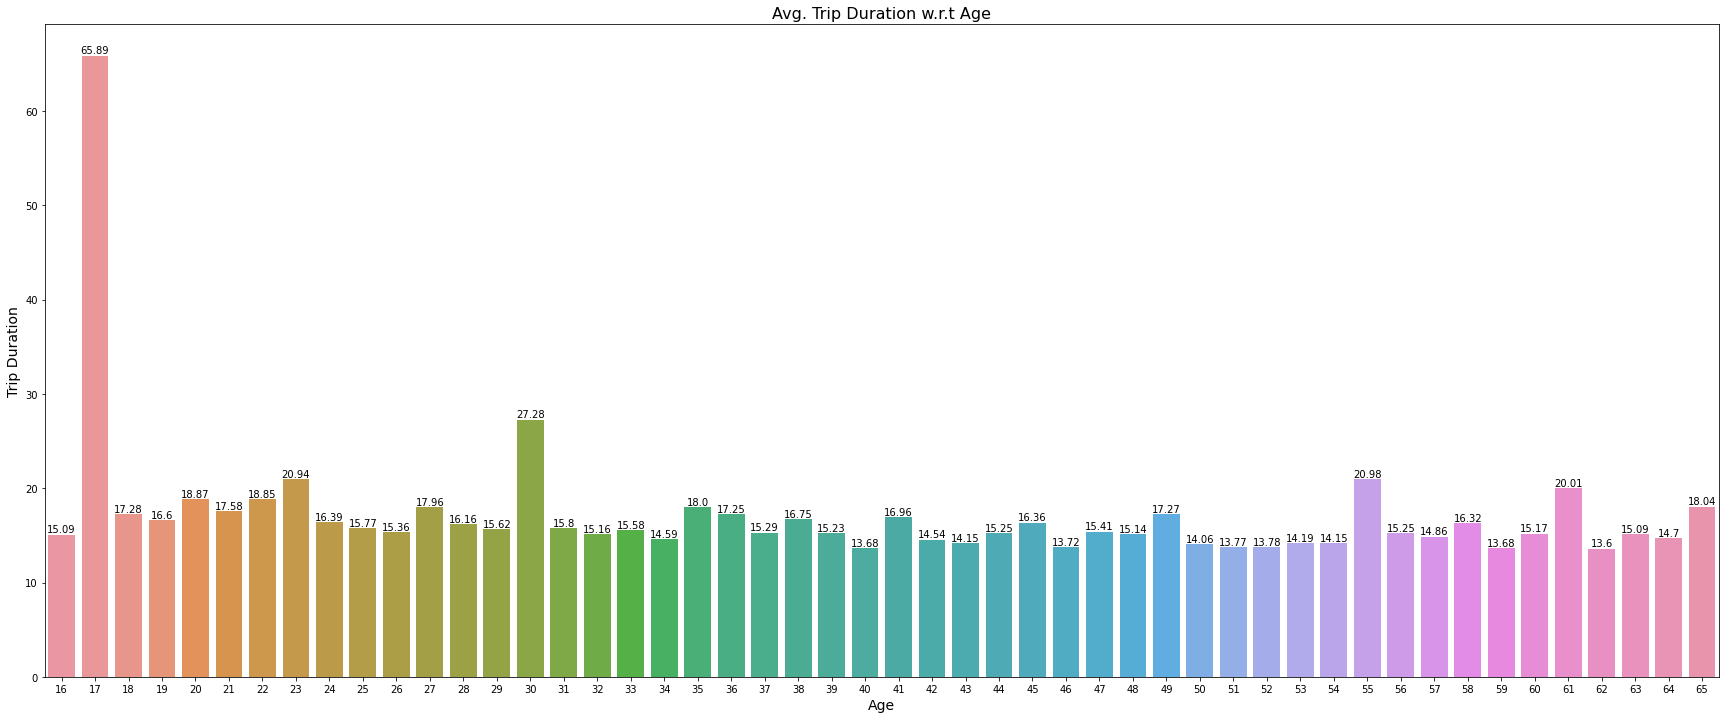

In [ ]:
df = pd.DataFrame(data.groupby(['age'])['trip_duration'].mean()).reset_index()

plt.figure(figsize = (30,12))
ax = sns.barplot(x = 'age', y = 'trip_duration', data = df)
for bar in ax.patches:
  value = bar.get_height()
  text = str(round(value, 2))
  text_x = bar.get_x() + bar.get_width()/2
  text_y = bar.get_y() + value
  ax.text(text_x, text_y, text, ha = 'center', va = 'bottom', size = 10)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Trip Duration', fontsize = 14)
plt.title('Avg. Trip Duration w.r.t Age', fontsize = 16)
plt.show()

### Age 17 has the highest trip duration.

In [ ]:
fig = px.histogram(df, x = 'age', y = 'trip_duration', labels = dict(age = 'Age', trip_duration = 'Trip Duration'))
fig.update_layout(barmode = 'group', title={
        'text': "Cummalative Trip Duration",
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### The cummalative trip duration shows that, the group of people between 20-29 has the highest Trip Duration among all.

#                                  Thank You for reading...!!!